In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#pd.read_csv?
#plt.plot?
#plt.errorbar?

### Ejercicio 1

In [3]:
df = pd.read_csv("datos.csv")
df.head()

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000001,0.000006
1,-23.020,0.000005,0.000003,0.000011
2,-22.870,0.000017,0.000013,0.000026
3,-22.698,0.000035,0.000025,0.000044
4,-22.565,0.000082,0.000058,0.000105


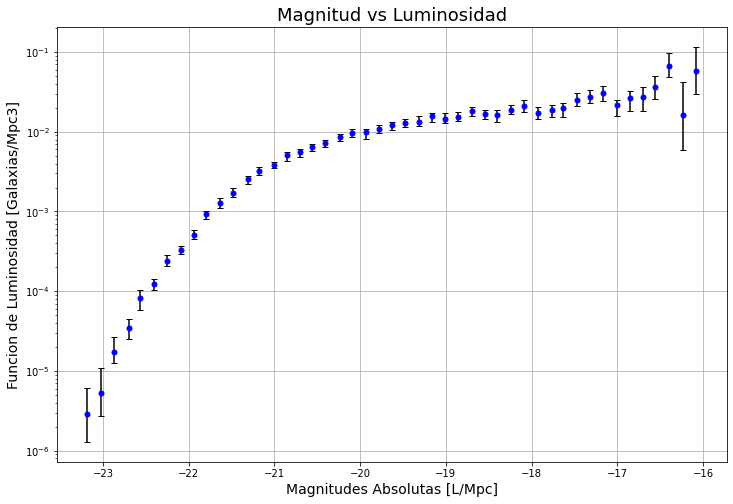

In [4]:
plt.figure(figsize=(12,8))
#plt.plot(df['MAG'],df['PHI'],'o')
#plt.errorbar(df['MAG'],df['PHI'],yerr = df['error_sup']-df['error_inf'])
error_s =  df['error_sup'] - df['PHI']
error_i =  -df['error_inf'] + df['PHI']
plt.errorbar(df['MAG'], df['PHI'],  yerr = [error_i,error_s], fmt='ob',ms = 5,  capsize=3,  ecolor="k")
plt.xlabel('Magnitudes Absolutas [L/Mpc]',fontsize = 14); plt.ylabel('Funcion de Luminosidad [Galaxias/Mpc3]',fontsize = 14)
plt.yscale('log')
plt.grid()
plt.title('Magnitud vs Luminosidad',fontsize = 18 )
plt.show()

### Ejercicio 2

In [5]:
def schechter(M,phi0,a0,M0):
    lista = []
    for i in range(len(M)):
        p = 10**((-0.4*(M[i] - M0))*(a0 + 1))
        r = np.exp(-10**(-0.4*(M[i] -M0 )))
        y =y=0.4 * np.log(10) * phi0 * p * r
        lista.append(y)
    return(lista)

In [6]:
#schechter(df['MAG'],1.46,1.20,-20.83)
#plt.legend?

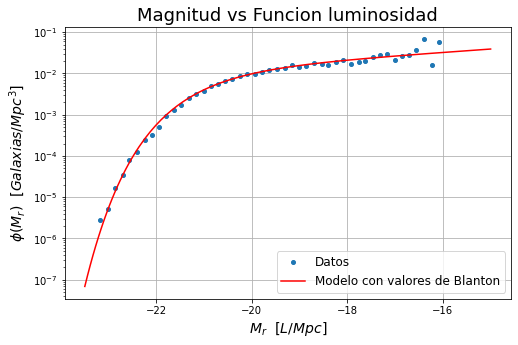

In [7]:
plt.figure(figsize=(8,5))
plt.plot(df['MAG'],df['PHI'],'o',label = 'Datos',ms = 4)
sx = np.linspace(-23.5, -15, 150)
sy = schechter(sx,0.0146,-1.20,-20.83) # estos valores son los obtenidos de Blanton et al. (2001).
plt.plot(sx,sy, color='red', label='Modelo con valores de Blanton')
plt.xlabel('$ M_r $  $[L/Mpc]$',fontsize = 14); plt.ylabel('$\phi(M_r)$  $[Galaxias/Mpc^3]$',fontsize = 14)
plt.yscale('log')
plt.grid()
plt.title('Magnitud vs Funcion luminosidad',fontsize = 18 )
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

### Likelihood

Asumimos errores gaussianos para calcular el maximo Likelihood 

In [8]:
#st.norm?
#st.prod?
#st.norm.pdf?
#np.prod?

In [9]:
sigma = np.abs((error_s - error_i)/2)
#print(sigma)
#print(df['PHI'][4])
#schechter(df['MAG'],0.0146, -1.20, -20.83)[4]

In [10]:
def likelihood(M,phi,phi0,a0,M0,sigma):
    phi_model = schechter(M,phi0,a0,M0) # valor de phi calculado por el modelo 
    #b = 1/((np.sqrt(2*np.pi))*sigma)
    w = ((phi - phi_model)/sigma)**2
    p = -np.sum(w)
    #l = np.sum(np.log(p[~np.isnan(p)])) # aca hago la productoria de los valores y es el likelihood
    return(p)

In [11]:
likelihood(df['MAG'],df['PHI'],0.0146, -1.20, -20.83,sigma) #hacer 

-73501.97688009443

In [12]:
fi0 = np.linspace(0.005,0.025,100)
A0 = np.linspace(-1.80,-0.4,100)
m0 = np.linspace(-24,-18,100)
h = []
n = []
j = []
for i in range(100):        
    g = likelihood(df['MAG'],df['PHI'],fi0[i], -1.20, -20.83,sigma)
    l = likelihood(df['MAG'],df['PHI'],0.0146, A0[i], -20.83,sigma)
    m = likelihood(df['MAG'],df['PHI'],0.0146, -1.20, m0[i],sigma)
    h.append(g)
    n.append(l)
    j.append(m)

In [13]:
#plt.plot(fi0,h,'o')
#plt.subplot?

In [14]:
#plt.plot(A0, n,'o')

In [15]:
#plt.plot(m0,j,'o')

In [16]:
#plt.contour?

In [77]:
# aca tengo q variar cada uno de los parametros y ver como afecta esto a el ajuste de la funcion schechter
fi0 = np.linspace(0.001,0.05,10)
A0 = np.linspace(-3,3,10)
m0 = np.linspace(-24,-18,10)
p = []
o = []
q = []
for i in range(10):        
    g = schechter(sx,fi0[i], -1.20, -20.83) # tengo q cambiar el likelihood por la schechter
    l = schechter(sx,0.0146, A0[i], -20.83)
    m = schechter(sx,0.0146, -1.20, m0[i])
    p.append(g)
    o.append(l)
    q.append(m)

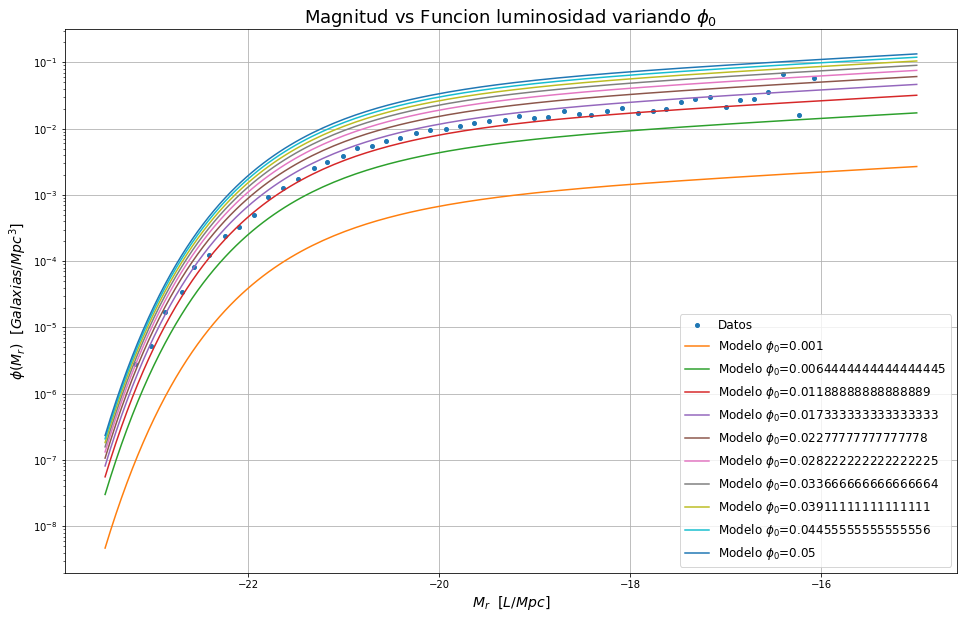

In [18]:
plt.figure(figsize=(16,10))
plt.plot(df['MAG'],df['PHI'],'o',label = 'Datos',ms = 4)
sx = np.linspace(-23.5, -15, 150)
sy = schechter(sx,0.0146,-1.20,-20.83) # estos valores son los obtenidos de Blanton et al. (2001).
for i in range(10):
    plt.plot(sx,p[i], label=f"Modelo $ \phi_0$={fi0[i]}")
plt.xlabel('$ M_r $  $[L/Mpc]$',fontsize = 14); plt.ylabel('$\phi(M_r)$  $[Galaxias/Mpc^3]$',fontsize = 14)
plt.yscale('log')
plt.grid()
plt.title('Magnitud vs Funcion luminosidad variando $\phi_0$',fontsize = 18 )
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

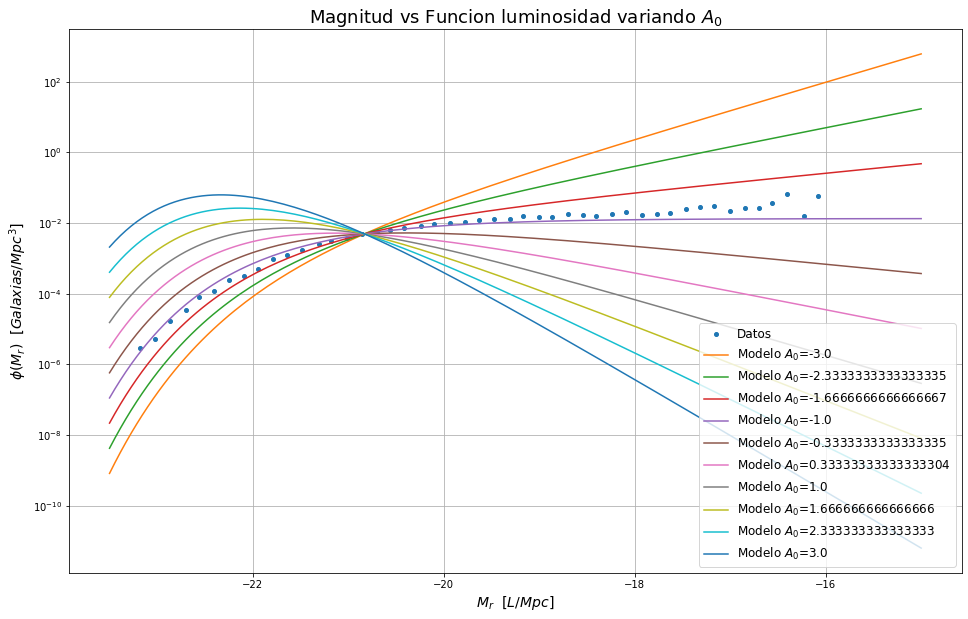

In [78]:
plt.figure(figsize=(16,10))
plt.plot(df['MAG'],df['PHI'],'o',label = 'Datos',ms = 4)
sx = np.linspace(-23.5, -15, 150)
sy = schechter(sx,0.0146,-1.20,-20.83) # estos valores son los obtenidos de Blanton et al. (2001).
for i in range(10):
    plt.plot(sx,o[i], label=f"Modelo $ A_0$={A0[i]}")
plt.xlabel('$ M_r $  $[L/Mpc]$',fontsize = 14); plt.ylabel('$\phi(M_r)$  $[Galaxias/Mpc^3]$',fontsize = 14)
plt.yscale('log')
plt.grid()
plt.title('Magnitud vs Funcion luminosidad variando $A_0$',fontsize = 18 )
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

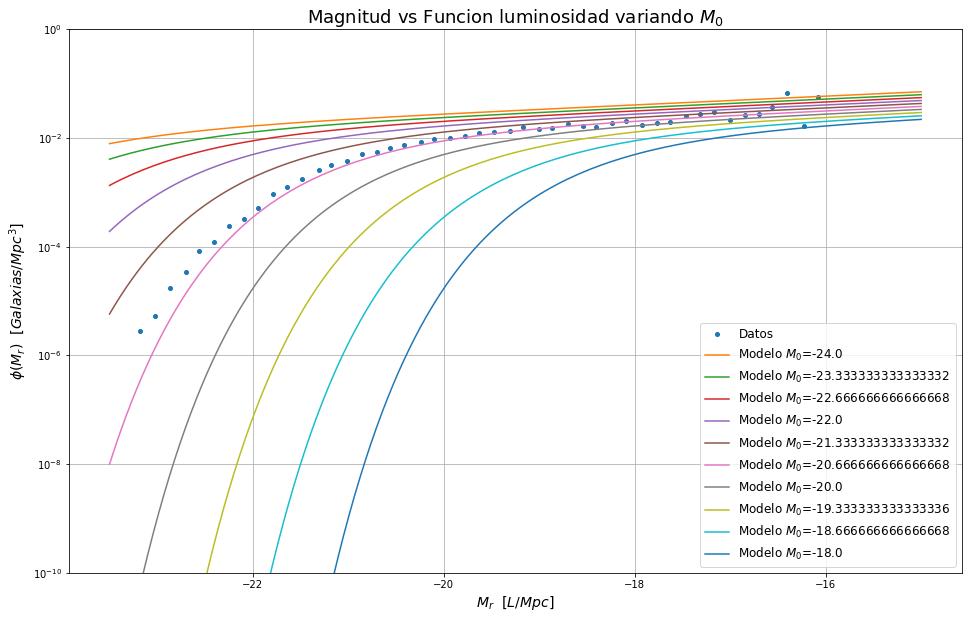

In [20]:
plt.figure(figsize=(16,10))
plt.plot(df['MAG'],df['PHI'],'o',label = 'Datos',ms = 4)
sx = np.linspace(-23.5, -15, 150)
sy = schechter(sx,0.0146,-1.20,-20.83) # estos valores son los obtenidos de Blanton et al. (2001).
for i in range(10):
    plt.plot(sx,q[i], label=f"Modelo $ M_0$={m0[i]}")
plt.xlabel('$ M_r $  $[L/Mpc]$',fontsize = 14); plt.ylabel('$\phi(M_r)$  $[Galaxias/Mpc^3]$',fontsize = 14)
plt.yscale('log')
plt.ylim(0.0000000001,1)
plt.grid()
plt.title('Magnitud vs Funcion luminosidad variando $M_0$',fontsize = 18 )
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

In [40]:
#plt.contour?

In [100]:
fi0c = np.linspace(0.0,1,100)
A0c = np.linspace(-10,10,100)
m0c = np.linspace(-30,-5,100)
hc1 = []
hc2 = []
hc3 = []
for i in range(100):    
    hc = []
    for j in range(100):
        g = likelihood(df['MAG'],df['PHI'],0.0146, A0c[i], m0c[j],sigma)
        hc.append(g)
    hc1.append(hc)
for i in range(100):    
    hc = []
    for j in range(100):
        g = likelihood(df['MAG'],df['PHI'],fi0c[i],-1.20, m0c[j],sigma)
        hc.append(g)
    hc2.append(hc)
for i in range(100):    
    hc = []
    for j in range(100):
        g = likelihood(df['MAG'],df['PHI'],fi0c[i],A0c[j], -20.83,sigma)
        hc.append(g)
    hc3.append(hc)
#hc1   

#plt.contour(fi0c, A0c,hc1)
#plt.show()

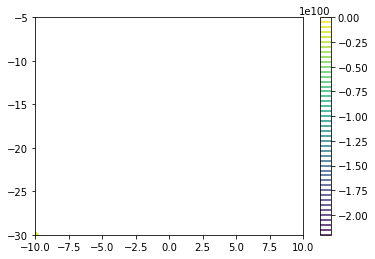

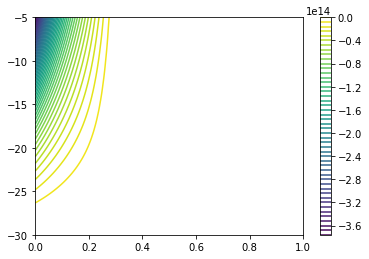

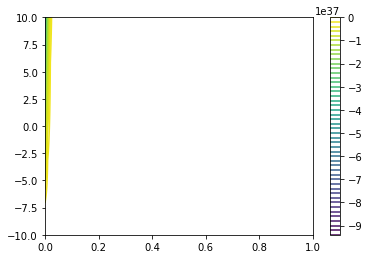

In [101]:
plt.contour(A0c,m0c,hc1,levels = 50)
plt.colorbar()
plt.show()
plt.contour(fi0c,m0c,hc2,levels = 50)
plt.colorbar()
plt.show()
plt.contour(fi0c,A0c,hc3,levels = 50)
plt.colorbar()
plt.show()

In [76]:
#np.shape(hc1)

In [38]:
#np.shape(hc)

In [29]:
#hc = np.array(hc)

In [31]:
#hc = hc.reshape((10,10))

In [37]:
#hc.shape

In [92]:
def priors(phi0,A0,m0,philim,Alim,Mlim):
    if (philim[0]< phi0) & (phi0 < philim[1]) & (A0 > Alim[0]) & (A0 < Alim[1]) & (Mlim[0]< m0) & (Mlim[1]> m0):
        return 1 
    else:
        return 0 

In [ ]:
def posteriori (m,f,phi0,a0,m0,sigma):
    return likelehood(m,f,phi0,a0,m0,sigma) + np.log(priors)

In [89]:
def saltos(philim,Alim,Mlim):
    salto_phi = np.random.random()*(2.0-1.0)*((philim[1]-philim[0])/100)
    salto_A = np.random.random()*(2.0-1.0)*((Alim[1]-Alim[0])/100)
    salto_M = np.random.random()*(2.0-1.0)*((Alim[1]-Alim[0])/100)
    return (salto = (salto_phi,salto_A,salto_M))   